## ANNs With Keras

**Workflow:**
1. `model = Sequential([layer1(.), layer2(.), layer3(.), ...], name='name')`
2. `model.compile('adam', loss='mse', metrics=['accuracy])`
3. `fit_report = model.fit(x_train, y_train, batch_size=32, epochs=200, validation_data=(x_val, y_val))`
4. `eval_report = model.evaluate(x_test, y_test)`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import Input
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

### Data

In [2]:
houses_df = pd.read_csv("../Data File/housepricedata.csv")
houses_df
houses_data_mat = houses_df.values

X = houses_data_mat[:, 0:-1]
X_normalized = preprocessing.MinMaxScaler().fit_transform(X)
y = houses_data_mat[:, -1]
x_train, x_val_test, y_train, y_val_test = train_test_split(X_normalized, y, test_size=0.3)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5)

### Models

In [3]:
n_inputs = X_normalized.shape[1]
n_outputs = 1

model_1 = Sequential([
    Input((n_inputs, )),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(n_outputs, activation='sigmoid')
], name="Model_1")

model_2 = Sequential([
    Input((n_inputs, )),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(n_outputs, activation='sigmoid')
], name="Model_2")

model_3 = Sequential([
    Input((n_inputs, )),
    Dense(1000, activation='relu'),
    Dropout(0.5),
    Dense(1000, activation='relu'),
    Dropout(0.5),
    Dense(1000, activation='relu'),
    Dropout(0.5),
    Dense(1000, activation='relu'),
    Dropout(0.5),
    Dense(n_outputs, activation='sigmoid')
], name="Model_3")

model_1.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
model_2.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
model_3.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

# model_1.summary()
# model_2.summary()
# model_3.summary()

### Train

In [ ]:
hist_1 = model_1.fit(x_train, y_train, batch_size=32, epochs=200, validation_data=(x_val, y_val), verbose='off')
hist_2 = model_2.fit(x_train, y_train, batch_size=32, epochs=200, validation_data=(x_val, y_val), verbose='off')
hist_3 = model_3.fit(x_train, y_train, batch_size=32, epochs=200, validation_data=(x_val, y_val), verbose='off')

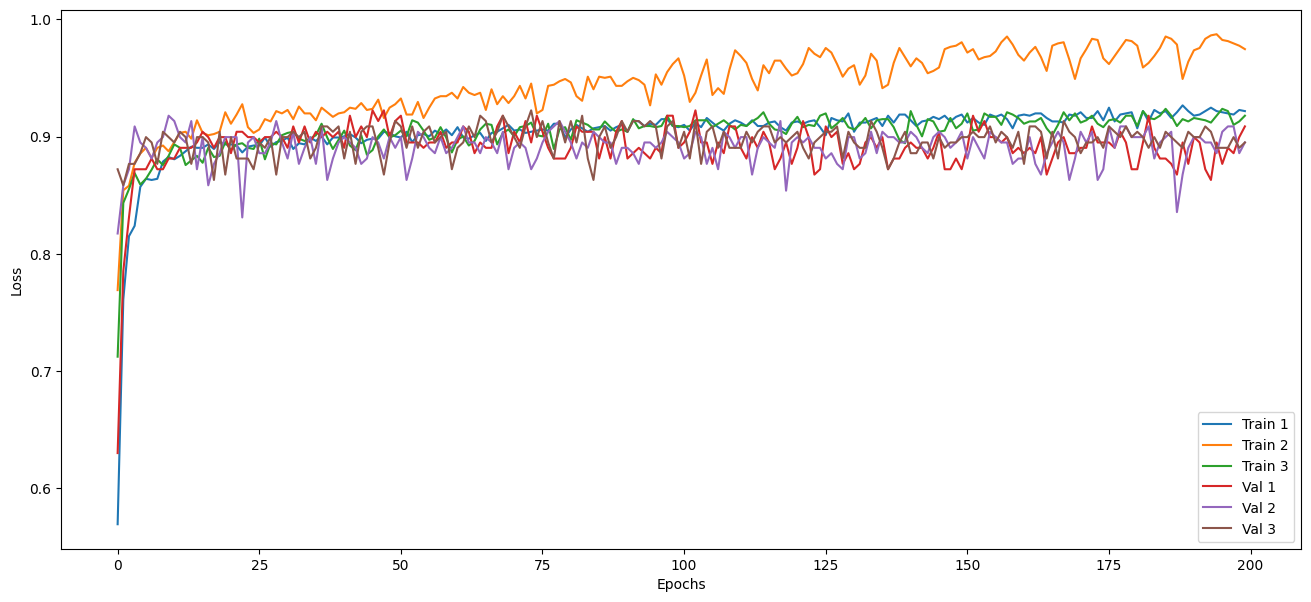

In [5]:
fig = plt.figure(figsize=(16, 7))
plt.plot(hist_1.history["accuracy"], label="Train 1")
plt.plot(hist_2.history["accuracy"], label="Train 2")
plt.plot(hist_3.history["accuracy"], label="Train 3")
plt.plot(hist_1.history["val_accuracy"], label="Val 1")
plt.plot(hist_2.history["val_accuracy"], label="Val 2")
plt.plot(hist_3.history["val_accuracy"], label="Val 3")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [6]:
model_1.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8950 - loss: 0.3640 


[0.34298527240753174, 0.8995434045791626]

In [7]:
model_2.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8991 - loss: 1.1727 


[0.9342465400695801, 0.8949771523475647]

In [8]:
model_3.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9261 - loss: 0.7865 


[0.6640392541885376, 0.922374427318573]